<a href="https://colab.research.google.com/github/preetmodi/Credit-Risk-Analytics/blob/main/WoE_V.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!sudo echo -ne '\n' | sudo add-apt-repository ppa:alessandro-strada/ppa >/dev/null 2>&1 # note: >/dev/null 2>&1 is used to supress printing
!sudo apt update >/dev/null 2>&1
!sudo apt install google-drive-ocamlfuse >/dev/null 2>&1
!google-drive-ocamlfuse
!sudo apt-get install w3m >/dev/null 2>&1 # to act as web browser 
!xdg-settings set default-web-browser w3m.desktop >/dev/null 2>&1 # to set default browser 
%cd /content
!mkdir gdrive
%cd gdrive
!mkdir "My Drive"
!google-drive-ocamlfuse "/content/gdrive/My Drive"
     

/content
mkdir: cannot create directory ‘gdrive’: File exists
/content/gdrive
mkdir: cannot create directory ‘My Drive’: File exists
fuse: mountpoint is not empty
fuse: if you are sure this is safe, use the 'nonempty' mount option


In [4]:
%cd /content/gdrive/My Drive/Data/

/content/gdrive/My Drive/Data


In [1]:
import scorecardpy as sc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random
%matplotlib inline
random.seed(251256517)

In [5]:
df_train = pd.read_csv("Train.csv",index_col=0, low_memory=False)

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 848276 entries, 0 to 1280644
Data columns (total 57 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   loan_amnt                   848276 non-null  float64
 1   term                        848276 non-null  object 
 2   installment                 848276 non-null  float64
 3   home_ownership              848276 non-null  object 
 4   annual_inc                  848276 non-null  float64
 5   purpose                     848276 non-null  object 
 6   title                       848276 non-null  object 
 7   zip_code                    848276 non-null  object 
 8   addr_state                  848276 non-null  object 
 9   dti                         848276 non-null  float64
 10  delinq_2yrs                 848276 non-null  float64
 11  earliest_cr_line            848276 non-null  object 
 12  fico_range_low              848276 non-null  float64
 13  fico_range_hi

In [ ]:
df_train.head()

,loan_amnt,term,installment,home_ownership,annual_inc,purpose,title,zip_code,addr_state,dti,...,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,Default,coborrower_inc,bank_dlq,il_acc,payment_history,collateral_coverage_ratio
0,24700.0,36 months,820.28,MORTGAGE,65000.0,small_business,Business,577xx,SD,16.06,...,314017.0,39475.0,79300.0,24667.0,0,0.0,0,1,0.631895,0.998664
2,20000.0,36 months,631.26,MORTGAGE,85000.0,major_purchase,Major purchase,293xx,SC,17.61,...,193390.0,27937.0,14500.0,36144.0,0,0.0,0,1,0.666333,1.807200
6,18000.0,60 months,471.70,RENT,150000.0,debt_consolidation,Debt consolidation,916xx,CA,9.39,...,65819.0,36247.0,10300.0,31319.0,1,0.0,0,1,0.740741,1.739944
8,16000.0,60 months,379.39,MORTGAGE,48000.0,credit_card,Credit card refinancing,297xx,SC,33.18,...,298100.0,31329.0,281300.0,13400.0,0,0.0,1,1,0.367947,0.837500
10,6000.0,36 months,186.61,MORTGAGE,100000.0,debt_consolidation,Debt consolidation,750xx,TX,13.28,...,156354.0,22741.0,3800.0,36083.0,0,0.0,1,1,0.812000,6.013833


In [ ]:
print(df_train.dtypes)

loan_amnt                     float64
term                           object
installment                   float64
home_ownership                 object
annual_inc                    float64
purpose                        object
title                          object
zip_code                       object
addr_state                     object
dti                           float64
delinq_2yrs                   float64
earliest_cr_line               object
fico_range_low                float64
fico_range_high               float64
inq_last_6mths                float64
open_acc                      float64
pub_rec                       float64
revol_bal                     float64
revol_util                    float64
total_acc                     float64
application_type               object
dti_joint                     float64
tot_coll_amt                  float64
tot_cur_bal                   float64
total_bal_il                  float64
il_util                       float64
acc_open_pas

In [ ]:
df_train['home_ownership']. unique()

array(['MORTGAGE', 'RENT', 'OWN', 'ANY', 'NONE', 'OTHER'], dtype=object)

In [29]:
# Group 1 
group1_vars = ['loan_amnt', 'term', 'installment', 'home_ownership', 'annual_inc']

# Group 2
group2_vars = ['purpose', 'title', 'zip_code', 'addr_state', 'dti']

# Group 3
group3_vars = ['delinq_2yrs', 'earliest_cr_line', 'fico_range_low', 'fico_range_high', 'inq_last_6mths']

# Group 4
group4_vars = ['open_acc', 'pub_rec', 'revol_bal','revol_util', 'total_acc']

# List of the first 20 variables
first_20_vars = ['loan_amnt', 'term', 'installment', 'home_ownership', 'annual_inc',  
                 'purpose', 'title', 'zip_code', 'addr_state', 'dti', 
                 'delinq_2yrs', 'earliest_cr_line', 'fico_range_low', 'fico_range_high', 'inq_last_6mths', 
                 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc']

noerr_var = ['loan_amnt', 'term', 'home_ownership', 
             'purpose', 
             'delinq_2yrs','fico_range_low', 'fico_range_high', 'inq_last_6mths', 
             'open_acc', 'pub_rec', 'revol_bal', 'total_acc']
# Filter the list to get only numeric variables
numeric_columns = df_train[first_20_vars].select_dtypes(include=[np.number]).columns.tolist()
print(numeric_columns)



['loan_amnt', 'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'fico_range_low', 'fico_range_high', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc']


In [12]:
def preprocess_data(df):
    # Convert non-numeric columns to string
    non_numeric_cols = df.select_dtypes(include=['object']).columns
    df[non_numeric_cols] = df[non_numeric_cols].astype('str')
    
    # Create dummy variables for categorical columns
    df = pd.get_dummies(df, columns=non_numeric_cols, drop_first=True)

    # Convert numeric columns to float and replace NaNs with a suitable value
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    df[numeric_cols] = df[numeric_cols].astype('float64')
    df[numeric_cols] = df[numeric_cols].fillna(-999999)

    return df


In [ ]:
bins_trial = sc.woebin(df_train, y='Default',
                 x=group4_vars,  # Include only the first 5 variables
                 min_perc_fine_bin=0.01,  # How many bins to cut initially into
                 min_perc_coarse_bin=0.05,  # Minimum percentage per final bin
                 stop_limit=0.02,  # Minimum information value
                 max_num_bin=8,  # Maximum number of bins
                 method='tree'
                 )

In [30]:
bins = sc.woebin(df_train, y='Default',
                 x=noerr_var,  # Include only the first 5 variables
                 min_perc_fine_bin=0.01,  # How many bins to cut initially into
                 min_perc_coarse_bin=0.05,  # Minimum percentage per final bin
                 stop_limit=0.02,  # Minimum information value
                 max_num_bin=8,  # Maximum number of bins
                 method='tree'
                 )

[INFO] creating woe binning ...
Binning on 848276 rows and 13 columns in 00:01:11


{'loan_amnt': <Figure size 432x288 with 2 Axes>,
 'term': <Figure size 432x288 with 2 Axes>,
 'home_ownership': <Figure size 432x288 with 2 Axes>,
 'purpose': <Figure size 432x288 with 2 Axes>,
 'delinq_2yrs': <Figure size 432x288 with 2 Axes>,
 'fico_range_low': <Figure size 432x288 with 2 Axes>,
 'fico_range_high': <Figure size 432x288 with 2 Axes>,
 'inq_last_6mths': <Figure size 432x288 with 2 Axes>,
 'open_acc': <Figure size 432x288 with 2 Axes>,
 'pub_rec': <Figure size 432x288 with 2 Axes>,
 'revol_bal': <Figure size 432x288 with 2 Axes>,
 'total_acc': <Figure size 432x288 with 2 Axes>}

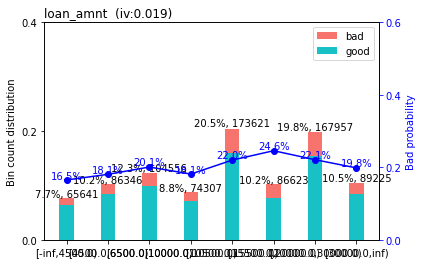

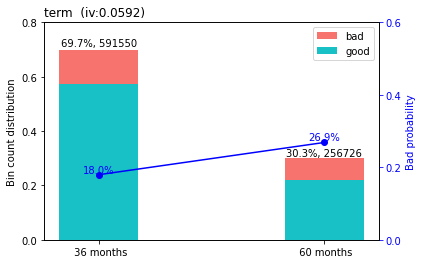

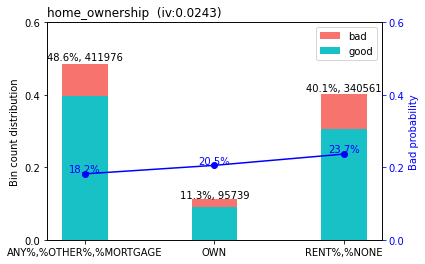

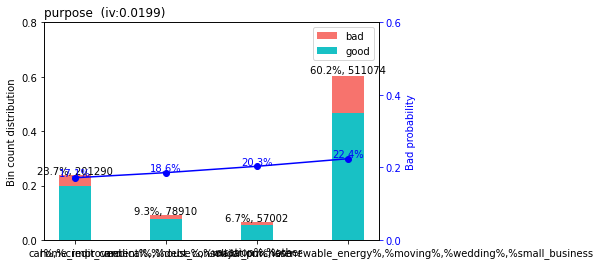

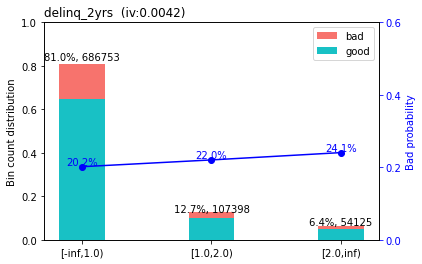

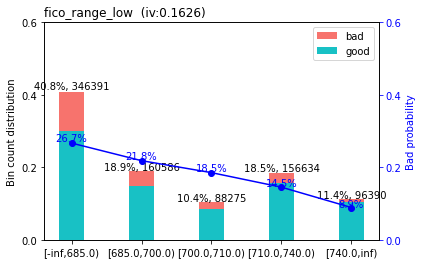

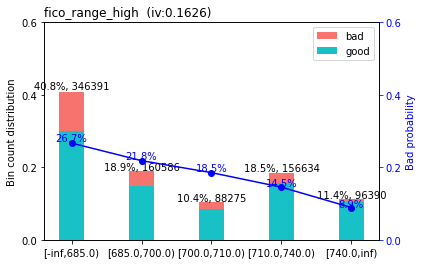

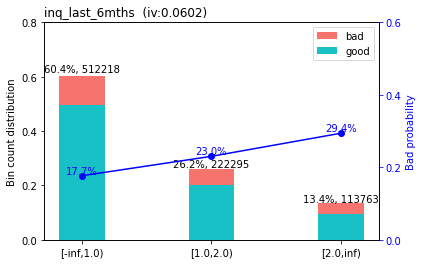

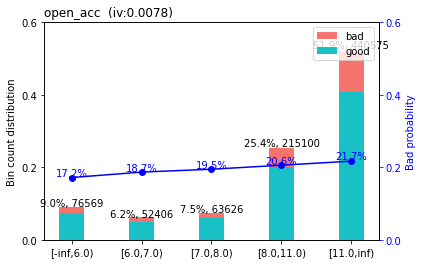

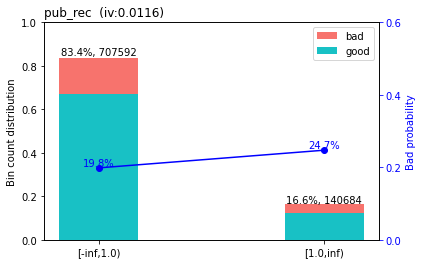

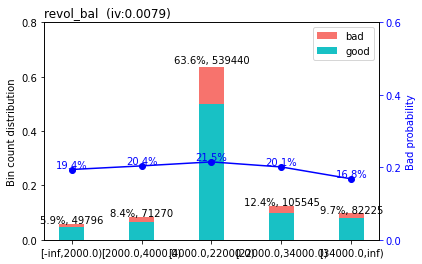

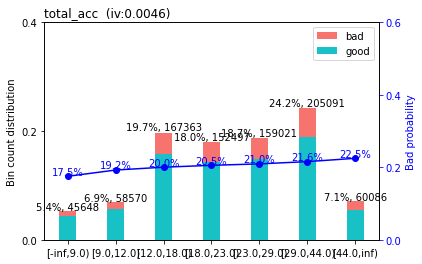

In [31]:
import seaborn as sns

sc.woebin_plot(bins)

-------- 1/12 loan_amnt --------
>>> dt[loan_amnt].describe(): 
count    848276.000000
mean      15267.165522
std        9184.180038
min        1000.000000
25%        8000.000000
50%       13200.000000
75%       20000.000000
max       40000.000000
Name: loan_amnt, dtype: float64 



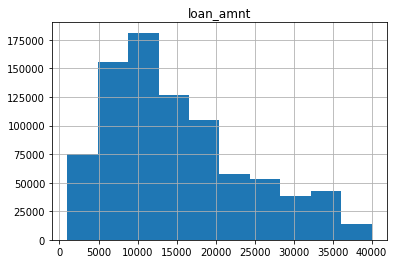

>>> Current breaks:
4500.0,6500.0,10000.0,10500.0,15500.0,20000.0,30000.0 



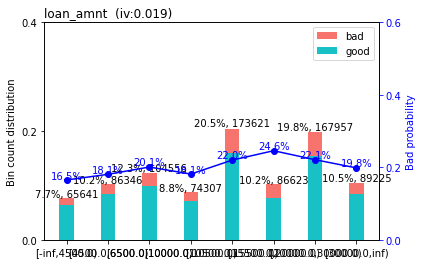

>>> Adjust breaks for (1/12) loan_amnt?
1: next 
2: yes 
3: back
Selection: 1
-------- 2/12 term --------
>>> dt[term].describe(): 
count         848276
unique             2
top        36 months
freq          591550
Name: term, dtype: object 

>>> dt[term].value_counts(): 
 36 months    591550
 60 months    256726
Name: term, dtype: int64 

>>> Current breaks:
' 36 months',' 60 months' 



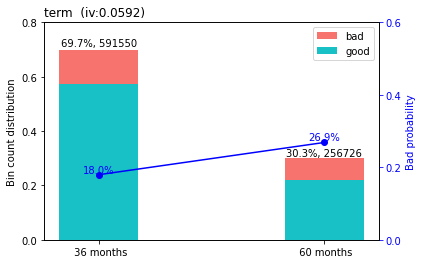

>>> Adjust breaks for (2/12) term?
1: next 
2: yes 
3: back
Selection: 1
-------- 3/12 home_ownership --------
>>> dt[home_ownership].describe(): 
count       848276
unique           6
top       MORTGAGE
freq        411585
Name: home_ownership, dtype: object 

>>> dt[home_ownership].value_counts(): 
MORTGAGE    411585
RENT        340545
OWN          95739
ANY            374
OTHER           17
NONE            16
Name: home_ownership, dtype: int64 

>>> Current breaks:
'ANY%,%OTHER%,%MORTGAGE','OWN','RENT%,%NONE' 



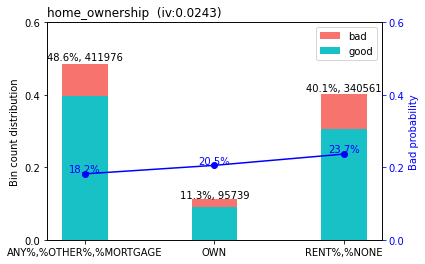

>>> Adjust breaks for (3/12) home_ownership?
1: next 
2: yes 
3: back
Selection: 1
-------- 4/12 purpose --------
>>> dt[purpose].describe(): 
count                 848276
unique                    13
top       debt_consolidation
freq                  485456
Name: purpose, dtype: object 

>>> dt[purpose].value_counts(): 
debt_consolidation    485456
credit_card           193207
home_improvement       55541
other                  51312
major_purchase         18202
medical                10058
small_business          8902
car                     8083
moving                  5771
vacation                5690
house                   5167
renewable_energy         544
wedding                  343
Name: purpose, dtype: int64 

>>> Current breaks:
'car%,%credit_card','home_improvement%,%house%,%major_purchase','vacation%,%other','medical%,%debt_consolidation%,%renewable_energy%,%moving%,%wedding%,%small_business' 



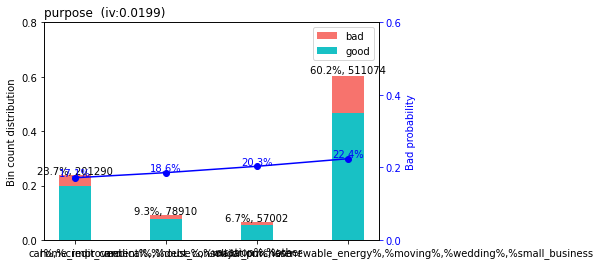

>>> Adjust breaks for (4/12) purpose?
1: next 
2: yes 
3: back
Selection: 1
-------- 5/12 delinq_2yrs --------
>>> dt[delinq_2yrs].describe(): 
count    848276.000000
mean          0.314737
std           0.881351
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          58.000000
Name: delinq_2yrs, dtype: float64 



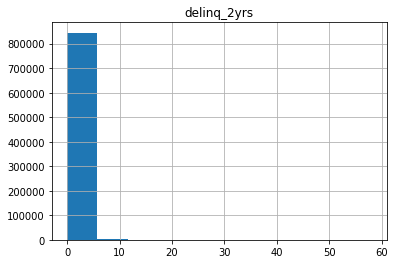

>>> Current breaks:
1.0,2.0 



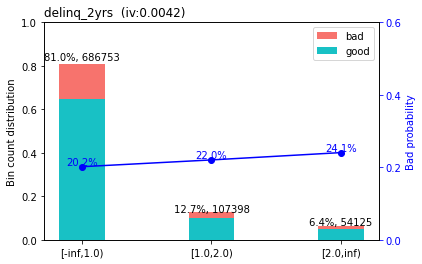

>>> Adjust breaks for (5/12) delinq_2yrs?
1: next 
2: yes 
3: back
Selection: 1
-------- 6/12 fico_range_low --------
>>> dt[fico_range_low].describe(): 
count    848276.000000
mean        697.033212
std          32.295208
min         660.000000
25%         670.000000
50%         690.000000
75%         715.000000
max         845.000000
Name: fico_range_low, dtype: float64 



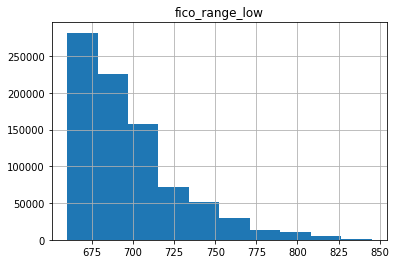

>>> Current breaks:
685.0,700.0,710.0,740.0 



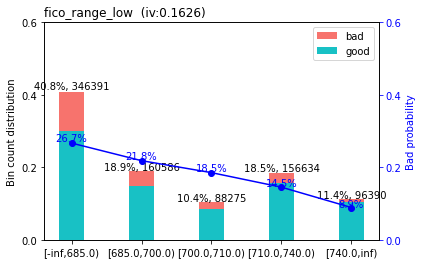

>>> Adjust breaks for (6/12) fico_range_low?
1: next 
2: yes 
3: back
Selection: 1
-------- 7/12 fico_range_high --------
>>> dt[fico_range_high].describe(): 
count    848276.000000
mean        701.033379
std          32.295977
min         664.000000
25%         674.000000
50%         694.000000
75%         719.000000
max         850.000000
Name: fico_range_high, dtype: float64 



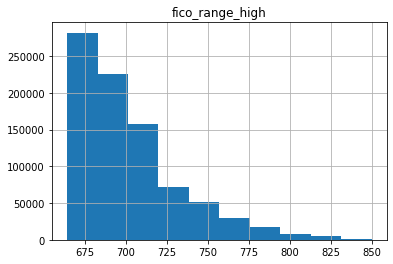

>>> Current breaks:
685.0,700.0,710.0,740.0 



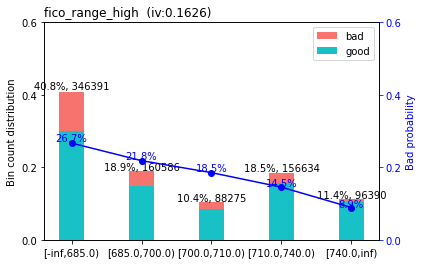

>>> Adjust breaks for (7/12) fico_range_high?
1: next 
2: yes 
3: back
Selection: 1
-------- 8/12 inq_last_6mths --------
>>> dt[inq_last_6mths].describe(): 
count    848276.000000
mean          0.588347
std           0.883843
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           8.000000
Name: inq_last_6mths, dtype: float64 

>>> dt[inq_last_6mths].value_counts(): 
0.0    512218
1.0    222295
2.0     77363
3.0     26643
4.0      7008
5.0      2397
6.0       351
8.0         1
Name: inq_last_6mths, dtype: int64 

>>> Current breaks:
1.0,2.0 



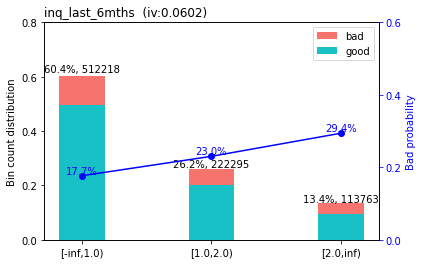

>>> Adjust breaks for (8/12) inq_last_6mths?
1: next 
2: yes 
3: back
Selection: 2
>>> Enter modified breaks: 1.0
[INFO] creating woe binning ...
>>> Current breaks:
1.0 



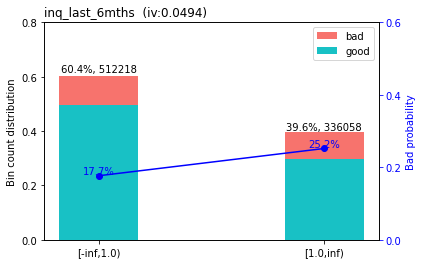

>>> Adjust breaks for (8/12) inq_last_6mths?
1: next 
2: yes 
3: back
Selection: 3
-------- 7/12 fico_range_high --------
>>> dt[fico_range_high].describe(): 
count    848276.000000
mean        701.033379
std          32.295977
min         664.000000
25%         674.000000
50%         694.000000
75%         719.000000
max         850.000000
Name: fico_range_high, dtype: float64 



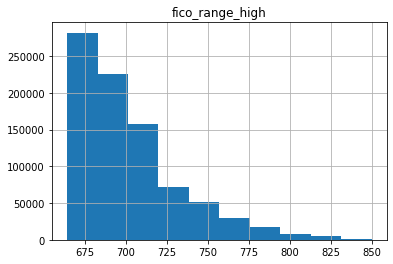

>>> Current breaks:
685.0,700.0,710.0,740.0 



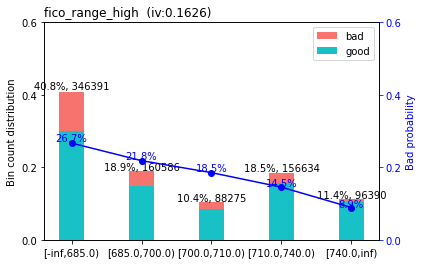

>>> Adjust breaks for (7/12) fico_range_high?
1: next 
2: yes 
3: back
Selection: 1
-------- 8/12 inq_last_6mths --------
>>> dt[inq_last_6mths].describe(): 
count    848276.000000
mean          0.588347
std           0.883843
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           8.000000
Name: inq_last_6mths, dtype: float64 

>>> dt[inq_last_6mths].value_counts(): 
0.0    512218
1.0    222295
2.0     77363
3.0     26643
4.0      7008
5.0      2397
6.0       351
8.0         1
Name: inq_last_6mths, dtype: int64 

>>> Current breaks:
1.0,2.0 



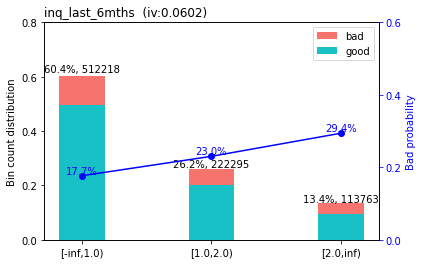

>>> Adjust breaks for (8/12) inq_last_6mths?
1: next 
2: yes 
3: back
Selection: 1
-------- 9/12 open_acc --------
>>> dt[open_acc].describe(): 
count    848276.000000
mean         11.770456
std           5.664810
min           1.000000
25%           8.000000
50%          11.000000
75%          15.000000
max          90.000000
Name: open_acc, dtype: float64 



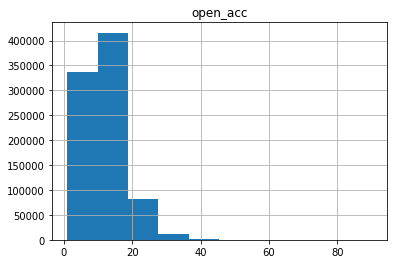

>>> Current breaks:
6.0,7.0,8.0,11.0 



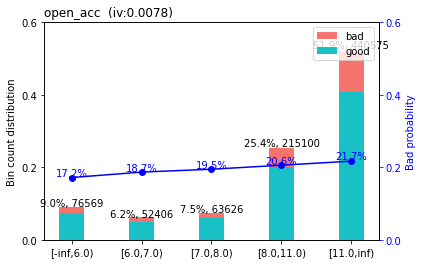

>>> Adjust breaks for (9/12) open_acc?
1: next 
2: yes 
3: back
Selection: 1
-------- 10/12 pub_rec --------
>>> dt[pub_rec].describe(): 
count    848276.000000
mean          0.207912
std           0.582784
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          86.000000
Name: pub_rec, dtype: float64 



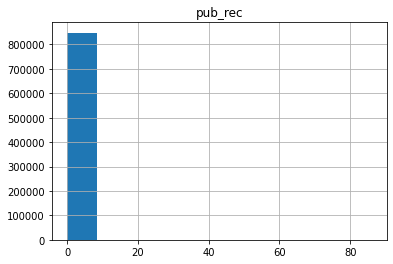

>>> Current breaks:
1.0 



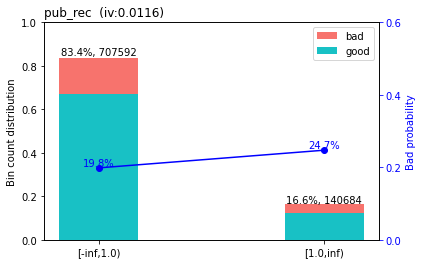

>>> Adjust breaks for (10/12) pub_rec?
1: next 
2: yes 
3: back
Selection: 1
-------- 11/12 revol_bal --------
>>> dt[revol_bal].describe(): 
count    8.482760e+05
mean     1.671214e+04
std      2.292433e+04
min      0.000000e+00
25%      6.091000e+03
50%      1.143200e+04
75%      2.033300e+04
max      2.904836e+06
Name: revol_bal, dtype: float64 



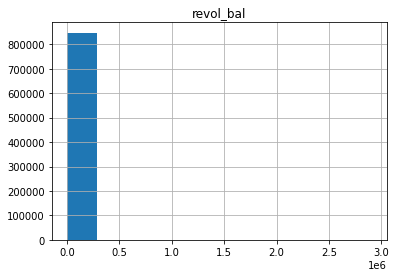

>>> Current breaks:
2000.0,4000.0,22000.0,34000.0 



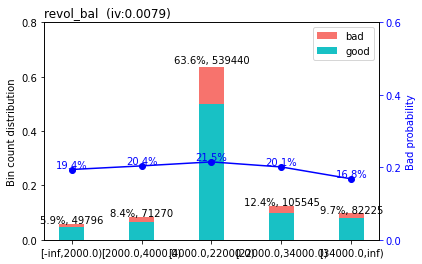

>>> Adjust breaks for (11/12) revol_bal?
1: next 
2: yes 
3: back
Selection: 1
-------- 12/12 total_acc --------
>>> dt[total_acc].describe(): 
count    848276.000000
mean         24.321741
std          12.026121
min           2.000000
25%          16.000000
50%          23.000000
75%          31.000000
max         176.000000
Name: total_acc, dtype: float64 



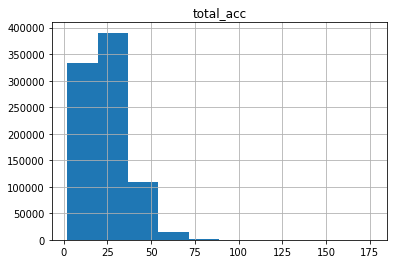

>>> Current breaks:
9.0,12.0,18.0,23.0,29.0,44.0 



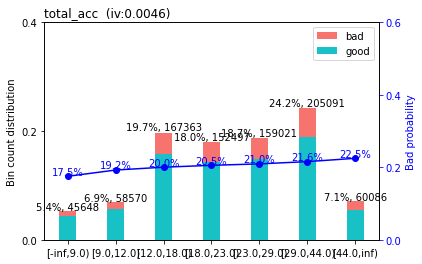

>>> Adjust breaks for (12/12) total_acc?
1: next 
2: yes 
3: back
Selection: 1


In [34]:
breaks_adj = sc.woebin_adj(df_train, "Default", bins, adj_all_var=True)

In [53]:
df_train['utilization_per_open_acc'] = df_train['revol_util'] / df_train['open_acc']

df_train['prop_recent_open_acc'] = df_train['acc_open_past_24mths'] / df_train['total_acc']


In [54]:
new_3 = ['prop_recent_open_acc']

In [55]:
bins_trial = sc.woebin(df_train, y='Default',
                 x=new_3,  # Include only the first 5 variables
                 min_perc_fine_bin=0.01,  # How many bins to cut initially into
                 min_perc_coarse_bin=0.05,  # Minimum percentage per final bin
                 stop_limit=0.02,  # Minimum information value
                 max_num_bin=8,  # Maximum number of bins
                 method='tree'
                 )

[INFO] creating woe binning ...
Binning on 848276 rows and 2 columns in 00:00:13


{'prop_recent_open_acc': <Figure size 432x288 with 2 Axes>}

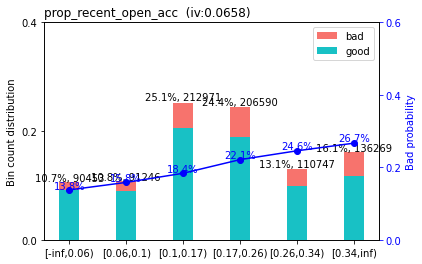

In [56]:
sc.woebin_plot(bins_trial)

In [48]:
# Select only numeric columns
numeric_columns = df_train.select_dtypes(include=np.number).columns

# Calculate correlation for numeric columns
correlation_matrix = df_train[numeric_columns].corr()
correlation_with_default = correlation_matrix['Default'].sort_values(ascending=False)

# Print correlations with 'Default'
print(correlation_with_default)


Default                       1.000000
acc_open_past_24mths          0.114895
inq_last_6mths                0.105833
percent_bc_gt_75              0.093828
bc_util                       0.090949
recent_inq_to_open_acc        0.086027
revol_util                    0.080652
mths_since_recent_inq         0.073785
num_actv_rev_tl               0.064411
num_rev_tl_bal_gt_0           0.063397
dti                           0.044489
pub_rec                       0.040830
pub_rec_bankruptcies          0.033300
num_op_rev_tl                 0.032329
installment                   0.031738
num_rev_accts                 0.030993
num_actv_bc_tl                0.030488
open_acc                      0.026211
num_sats                      0.025460
total_acc                     0.024499
loan_amnt                     0.023802
bank_dlq                      0.023741
delinq_2yrs                   0.023401
num_bc_tl                     0.022318
num_il_tl                     0.015968
tax_liens                